# Do yield curve inversions actually predict recessions?

**Purpose:** 'Yield curve inversions 


Matthew Garton
June 26, 2019

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [3]:
yield_curve = quandl.get('USTREASURY/YIELD')

In [4]:
recessions = pd.read_csv('../data/Recessions.csv', header=0, names=['Date', 'Is Recession'])

In [5]:
recessions['Date'] = pd.to_datetime(recessions['Date'])
recessions.set_index('Date', inplace=True)
recessions = recessions.resample('D').ffill()

In [6]:
yield_curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [7]:
yield_curve.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7377 entries, 1990-01-02 to 2019-06-26
Data columns (total 12 columns):
1 MO     4478 non-null float64
2 MO     173 non-null float64
3 MO     7374 non-null float64
6 MO     7377 non-null float64
1 YR     7377 non-null float64
2 YR     7377 non-null float64
3 YR     7377 non-null float64
5 YR     7377 non-null float64
7 YR     7377 non-null float64
10 YR    7377 non-null float64
20 YR    6438 non-null float64
30 YR    6383 non-null float64
dtypes: float64(12)
memory usage: 749.2 KB


In [8]:
yield_curve['10yr-3mo'] = yield_curve['10 YR'] - yield_curve['3 MO']

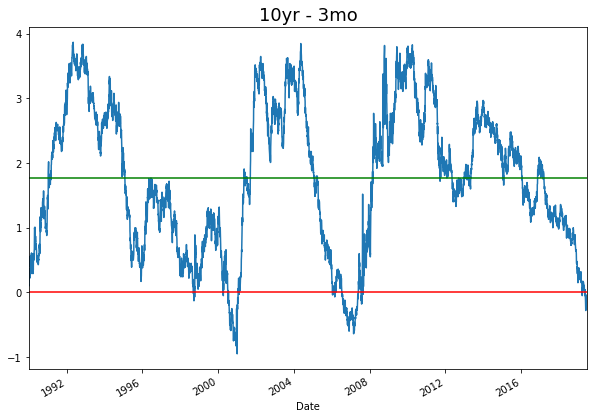

In [9]:
yield_curve['10yr-3mo'].plot(figsize=(10,7))
plt.title('10yr - 3mo', fontsize=18)
plt.axhline(y=0, color='r')
plt.axhline(y=yield_curve['10yr-3mo'].mean(), color='g');

In [10]:
yield_curve['5yr-2yr'] = yield_curve['5 YR'] - yield_curve['2 YR']

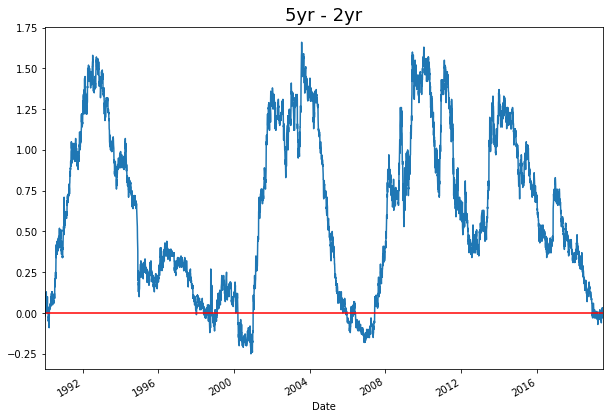

In [11]:
yield_curve['5yr-2yr'].plot(figsize=(10,7))
plt.title('5yr - 2yr', fontsize=18)
plt.axhline(y=0, color='r');

In [12]:
yield_curve = yield_curve.merge(recessions, on='Date')

In [13]:
yield_curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,10yr-3mo,5yr-2yr,Is Recession
Date,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,0.11,0.00,1.0
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,0.10,-0.02,1.0
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,0.14,-0.01,1.0
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,0.20,0.02,1.0
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,0.23,0.02,1.0


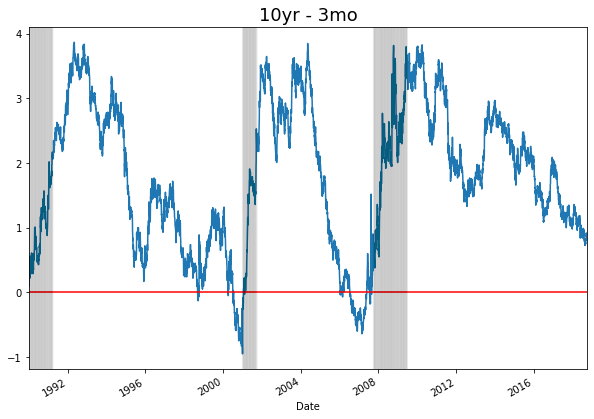

In [14]:
recession_dates = yield_curve[yield_curve['Is Recession'] == 1].index

yield_curve['10yr-3mo'].plot(figsize=(10,7))
plt.title('10yr - 3mo', fontsize=18)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

Sources: https://fredblog.stlouisfed.org/2018/10/the-data-behind-the-fear-of-yield-curve-inversions/

In [21]:
fred_data = pd.read_csv('../data/fredgraph.csv', skiprows=11, header=0, names=['Date', '10yr-1yr', '10yr-3mo'])
fred_data['Date'] = pd.to_datetime(fred_data['Date'])
fred_data.set_index('Date', inplace=True)
fred_data = fred_data.merge(recessions, on='Date')
fred_data.head()

,10yr-1yr,10yr-3mo,Is Recession
Date,,,
1967-10-01,0.11,0.92,0.0
1967-11-01,0.14,1.02,0.0
1967-12-01,-0.01,0.73,0.0
1968-01-01,0.10,0.53,0.0
1968-02-01,0.15,0.58,0.0


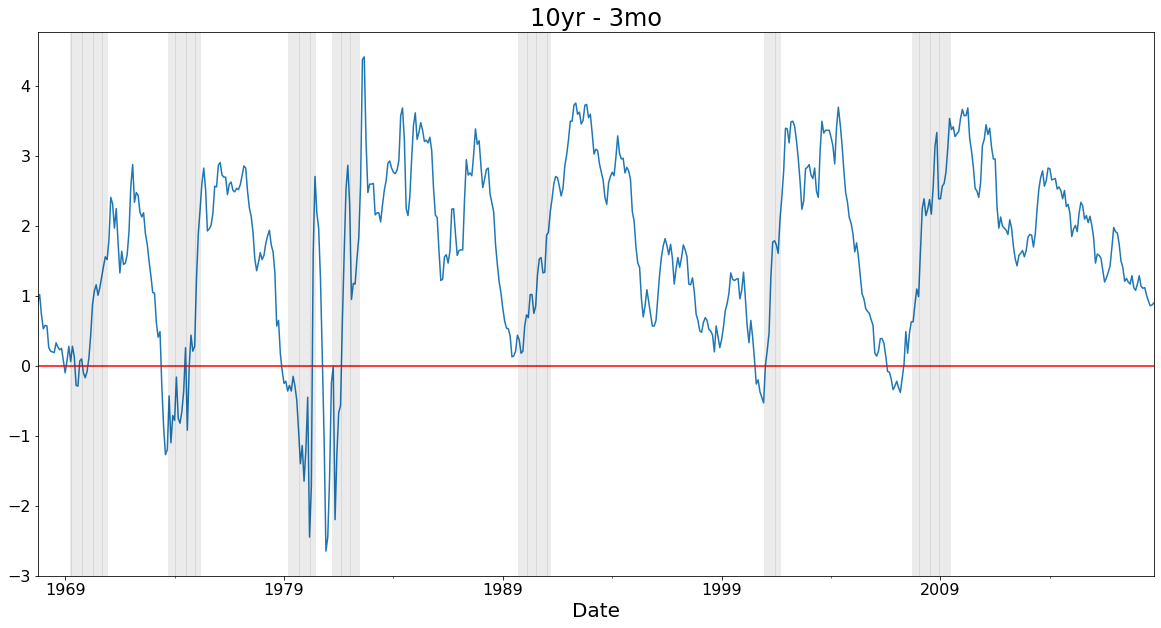

In [38]:
recession_dates = fred_data[fred_data['Is Recession'] == 1].index

fred_data['10yr-3mo'].plot(figsize=(20,10))
plt.title('10yr - 3mo', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.1);

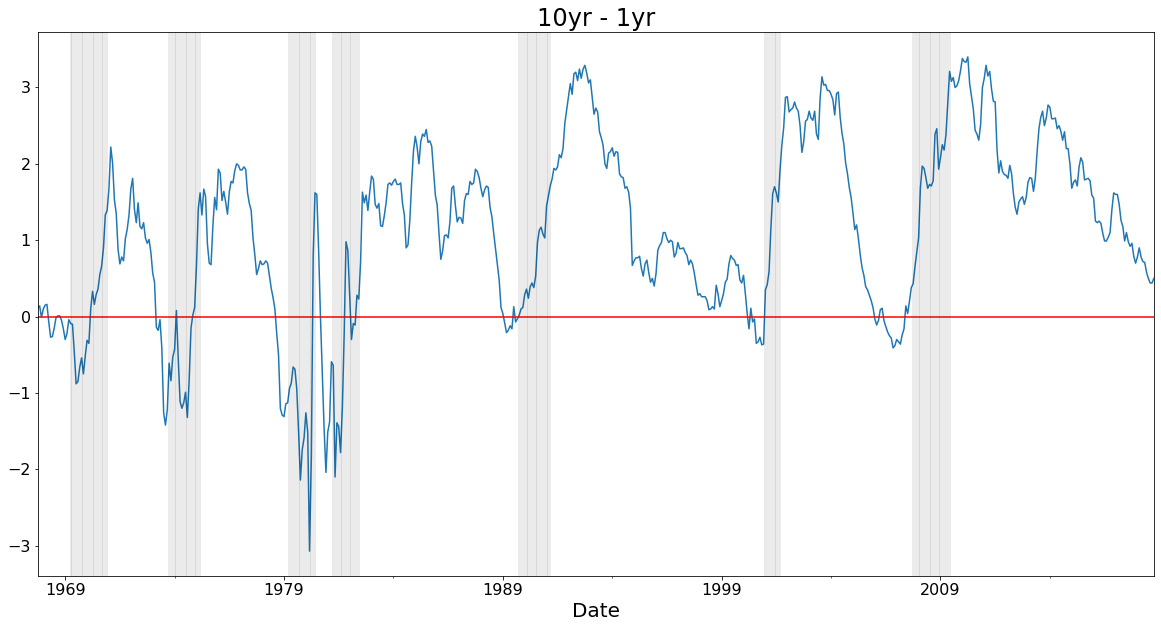

In [37]:
fred_data['10yr-1yr'].plot(figsize=(20,10))
plt.title('10yr - 1yr', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.1);